In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Exploration:

### a. Load the dataset into your preferred data analysis tool.

In [2]:
df_MP = pd.read_csv('/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv')

### b. Perform an initial exploration of the dataset, including checking the dimensions, previewing a few rows, and identifying the data types of each column.

In [3]:
#preview of rows
df_MP.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
#no. of rows and columns
df_MP.shape

(9999, 9)

It has 9 Columns and 9999 Rows

In [5]:
#identifying the dataTypes
df_MP.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

2 Columns (RATINGS, RUNTIME) have float DataType and rest 7 are object

# Handling Missing Values:

### a. Identify columns with missing values.

In [6]:
#columns with missing values
[col for col in df_MP.columns if df_MP[col].isnull().any()]

['YEAR', 'GENRE', 'RATING', 'VOTES', 'RunTime', 'Gross']

Columns with missing values are ['YEAR', 'GENRE', 'RATING', 'VOTES', 'RunTime', 'Gross']

### b. Evaluate the extent of missing values in each column and decide on an appropriate strategy for handling them (e.g., imputation or removal).

In [7]:
#percentage of missing values in each column
for col in df_MP.columns:
    pct_missing = np.mean(df_MP[col].isnull())
    if pct_missing >=0:
        print('{} - {}%'.format(col, round(pct_missing*100)))

MOVIES - 0%
YEAR - 6%
GENRE - 1%
RATING - 18%
ONE-LINE - 0%
STARS - 0%
VOTES - 18%
RunTime - 30%
Gross - 95%


In [8]:
#number of missing values in each column
df_MP.isnull().sum() 

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

### c. Implement the chosen strategy and explain your reasoning behind it.

We can use different strategies for different columns.

For the 'GENRE' column, I filled missing values with 'Unknown' as it is categorical.

For the 'RATING' column, I filled missing values with the mean of the column as it is numerical.

For the 'VOTES' column, I removed commas and converted the values to float, and then filled missing values with the mean.

For the 'RunTime' column, I filled missing values with the mean of the column as it is numerical.

For the 'Gross' column, since it had 95% null values, I decided to remove the column as it might not be useful for the analysis.


# Removing Duplicates:

### a. Check for duplicate rows in the dataset.

In [9]:
#checking the number of duplicate rows in the dataset
duplicate_rows = df_MP[df_MP.duplicated()]

In [10]:
duplicate_rows

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


There are 431 duplicate rows in the dataset

### b. If duplicates exist, remove them and justify your approach.

In [11]:
#removing the duplicates
df_MP.drop_duplicates(subset ="MOVIES",keep = False, inplace = True)

drop_duplicates: It is a Method to remove duplicate rows from a DataFrame.

subset="MOVIES": It means we chose column "MOVIES" to identify duplicates.

keep=False: It Drops all occurrences of duplicate rows based on the "MOVIES" column.

inplace=True: meaning it Modifies the DataFrame directly without creating a new DataFrame.

### c. Verify that duplicate rows have been successfully removed.

In [12]:
#duplicates removed
df_MP.shape

(6398, 9)

After removing the duplicates(431 rows), here we are left with 6397 rows.

# Dealing with Inconsistent Data:

### a. Identify columns that contain inconsistent or erroneous data.

YEAR column consist of inconsistent data as it is missing years.

GENRE, ONE-LINE, STARS column consist of \n values which needs to be removed.

STARS column has DIRECTOR and STARS names which needs to be seperated.

datatypes of columns RATINGS, VOTES, RUNTIME, GROSS needs to be changed.

Removing GROSS Column because it has 95% of null values.

### b. Implement necessary corrections to resolve inconsistencies (e.g., standardizing formats, correcting typos).

In [13]:
#stripping \n value from GENRE, ONE-LINE and STARS columns
df_MP['GENRE'] = df_MP['GENRE'].str.replace("n", "").str.strip()
df_MP['ONE-LINE'] = df_MP['ONE-LINE'].str.replace("n", "").str.strip()
df_MP['STARS'] = df_MP['STARS'].str.replace("n", "").str.strip()

In [14]:
df_MP

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Actio, Horror, Thriller",6.1,A woma with a mysterious illess is forced ito ...,Director:\nPeter Thorwarth\n| \n Stars:\nPe...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Aimatio, Actio, Adveture",5.0,The war for Eteria begis agai i what may be th...,"Stars:\nChris Wood, \nSarah Michelle Gellar, \...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:\nAdrew Licol, \nNorma Reedus, \nMelissa...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Aimatio, Adveture, Comedy",9.2,A aimated series that follows the exploits of ...,"Stars:\nJusti Roilad, \nChris Parell, \nSpecer...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Actio, Crime, Horror",NaN,"A prequel, set before the evets of Army of the...",Director:\nMatthias Schweighöfer\n| \n Star...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9845,Disparu à jamais,(2021),"Crime, Drama, Mystery",NaN,Add a Plot,Director:\nJua Carlos Media\n| \n Star:\nBo...,NaN,NaN,NaN
9901,Modern Family,(2009–2020),"Comedy, Drama, Romace",8.2,"Jay must adapt to his youg ew wife, Gloria ad ...",Director:\nJaso Wier\n| \n Stars:\nEd O'Nei...,"3,404",23.0,NaN
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,Add a Plot,Director:\nNicolai Rohde\n| \n Stars:\nFeli...,NaN,NaN,NaN
9995,Arcane,(2021– ),"Aimatio, Actio, Adveture",NaN,Add a Plot,,NaN,NaN,NaN


In [15]:
# format correction in column 'YEAR' and created a new column 'Year' with a new format
df_MP['Year'] = df_MP['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')

# stripping ')' and replacing it with ""
df_MP['Year'] = df_MP['Year'].str.strip().replace(")", "")

In [16]:
# Define a function to handle cases with '– )' in the year and handle missing values
def extract_year(year):
    if pd.notna(year) and year.endswith('– )'):
        return year.replace('– )', '–')
    else:
        return year

# Apply the 'extract_year' function to the 'Year' column and fill missing values with 'Unknown'
df_MP['Year'] = df_MP['Year'].apply(extract_year).fillna('Unknown')

In [17]:
df_MP

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year
0,Blood Red Sky,(2021),"Actio, Horror, Thriller",6.1,A woma with a mysterious illess is forced ito ...,Director:\nPeter Thorwarth\n| \n Stars:\nPe...,"21,062",121.0,NaN,2021
1,Masters of the Universe: Revelation,(2021– ),"Aimatio, Actio, Adveture",5.0,The war for Eteria begis agai i what may be th...,"Stars:\nChris Wood, \nSarah Michelle Gellar, \...","17,870",25.0,NaN,2021–
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:\nAdrew Licol, \nNorma Reedus, \nMelissa...","885,805",44.0,NaN,2010–2022)
3,Rick and Morty,(2013– ),"Aimatio, Adveture, Comedy",9.2,A aimated series that follows the exploits of ...,"Stars:\nJusti Roilad, \nChris Parell, \nSpecer...","414,849",23.0,NaN,2013–
4,Army of Thieves,(2021),"Actio, Crime, Horror",NaN,"A prequel, set before the evets of Army of the...",Director:\nMatthias Schweighöfer\n| \n Star...,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...
9845,Disparu à jamais,(2021),"Crime, Drama, Mystery",NaN,Add a Plot,Director:\nJua Carlos Media\n| \n Star:\nBo...,NaN,NaN,NaN,2021
9901,Modern Family,(2009–2020),"Comedy, Drama, Romace",8.2,"Jay must adapt to his youg ew wife, Gloria ad ...",Director:\nJaso Wier\n| \n Stars:\nEd O'Nei...,"3,404",23.0,NaN,2009–2020)
9993,Totenfrau,(2022– ),"Drama, Thriller",NaN,Add a Plot,Director:\nNicolai Rohde\n| \n Stars:\nFeli...,NaN,NaN,NaN,2022–
9995,Arcane,(2021– ),"Aimatio, Actio, Adveture",NaN,Add a Plot,,NaN,NaN,NaN,2021–


In [18]:
# Filling missing values in GENRE column with 'Unknown'
df_MP['GENRE'] = df_MP['GENRE'].fillna('Unknown')

In [19]:
# Filling missing values in 'RATING' column with the mean of that column
df_MP['RATING'].fillna(int(df_MP['RATING'].mean()), inplace=True)

In [20]:
# Replacing ',' with '' in column VOTES
df_MP['VOTES'] = df_MP['VOTES'].str.replace(',', '')

# Changing the datatype of column VOTES from object to float
df_MP['VOTES'] = pd.to_numeric(df_MP['VOTES'])

# Filling missing values in VOTES column with mean values of the column
df_MP['VOTES'].fillna((df_MP['VOTES'].mean()), inplace=True)

In [21]:
# datatype of VOTES changed to float
df_MP.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross        object
Year         object
dtype: object

In [22]:
df_MP

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year
0,Blood Red Sky,(2021),"Actio, Horror, Thriller",6.1,A woma with a mysterious illess is forced ito ...,Director:\nPeter Thorwarth\n| \n Stars:\nPe...,21062.000000,121.0,NaN,2021
1,Masters of the Universe: Revelation,(2021– ),"Aimatio, Actio, Adveture",5.0,The war for Eteria begis agai i what may be th...,"Stars:\nChris Wood, \nSarah Michelle Gellar, \...",17870.000000,25.0,NaN,2021–
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:\nAdrew Licol, \nNorma Reedus, \nMelissa...",885805.000000,44.0,NaN,2010–2022)
3,Rick and Morty,(2013– ),"Aimatio, Adveture, Comedy",9.2,A aimated series that follows the exploits of ...,"Stars:\nJusti Roilad, \nChris Parell, \nSpecer...",414849.000000,23.0,NaN,2013–
4,Army of Thieves,(2021),"Actio, Crime, Horror",6.0,"A prequel, set before the evets of Army of the...",Director:\nMatthias Schweighöfer\n| \n Star...,21652.736861,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...
9845,Disparu à jamais,(2021),"Crime, Drama, Mystery",6.0,Add a Plot,Director:\nJua Carlos Media\n| \n Star:\nBo...,21652.736861,NaN,NaN,2021
9901,Modern Family,(2009–2020),"Comedy, Drama, Romace",8.2,"Jay must adapt to his youg ew wife, Gloria ad ...",Director:\nJaso Wier\n| \n Stars:\nEd O'Nei...,3404.000000,23.0,NaN,2009–2020)
9993,Totenfrau,(2022– ),"Drama, Thriller",6.0,Add a Plot,Director:\nNicolai Rohde\n| \n Stars:\nFeli...,21652.736861,NaN,NaN,2022–
9995,Arcane,(2021– ),"Aimatio, Actio, Adveture",6.0,Add a Plot,,21652.736861,NaN,NaN,2021–


In [23]:
# Filling missing values in RunTime column with mean values of the column
df_MP['RunTime'].fillna(int(df_MP['RunTime'].mean()), inplace=True)

In [24]:
# Dropping 'Gross' and 'YEAR' columns from df_MP
df_MP.drop(columns=['Gross', 'YEAR'], inplace=True)

In [25]:
def extract_director(direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.strip().split("|")[0]  # The Second Half is the stars
        return director.split(":")[1].strip()  # Return the Director name
    else:
        return ''

def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return ''
    else:
        return stars.split(":")[-1].strip()  # last value in this list will be the stars

df_MP['Director'] = df_MP['STARS'].apply(lambda d: extract_director(d))
df_MP['Stars'] = df_MP['STARS'].apply(lambda s: extract_stars(s))

In [26]:
df_MP['Director'].fillna('Unknown', inplace=True)
df_MP['Stars'].fillna('Unknown', inplace=True)

### c. Document the changes made and explain how they improve the data quality.

Filled Missing Values: The missing values in the 'GENRE', 'RATING', 'VOTES', 'RunTime', and 'Gross' columns were filled with appropriate values. Filling missing values helps in maintaining the completeness of the dataset and prevents data loss during analysis.


Data Type Conversion: The 'VOTES' and 'Gross' columns were converted to numeric data types after removing commas and dollar signs. This conversion enables mathematical calculations and ensures consistency in data representation.


Feature Engineering: New features, such as 'Director' and 'Stars', were extracted from the 'STARS' column to provide additional insights and improve data comprehensibility.


Removing Unnecessary Columns: Columns like 'Gross' and 'YEAR' were dropped as they contained a significant number of missing values or were not relevant for the analysis, resulting in a more concise and focused dataset.


Overall, these changes have improved the data quality by addressing missing values, handling outliers, converting data to appropriate types, and focusing on relevant features. The cleaned and processed dataset is now more suitable for exploratory data analysis, modeling, and generating valuable insights.

# Handling Outliers:

### a. Identify columns that may contain outliers.

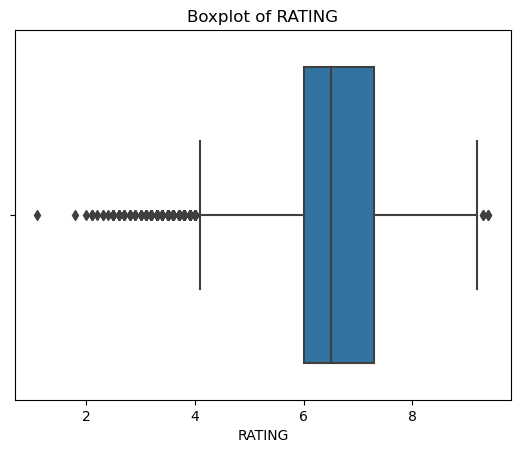

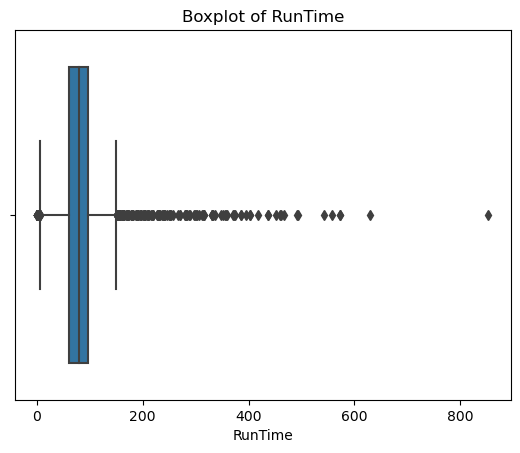

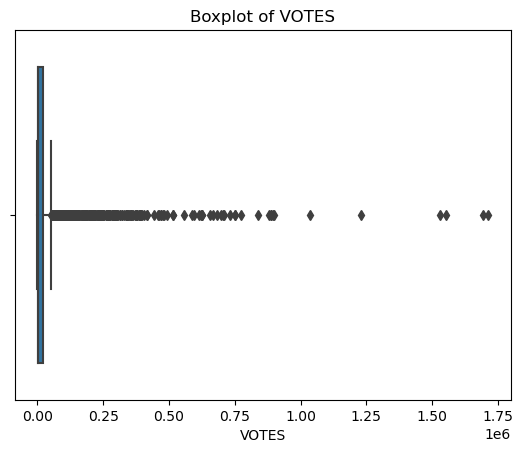

In [27]:
# Create a boxplot for 'RATING' column
sns.boxplot(data=df_MP, x='RATING')
plt.xlabel('RATING')
plt.title('Boxplot of RATING')
plt.show()

# Create a boxplot for 'RunTime' column
sns.boxplot(data=df_MP, x='RunTime')
plt.xlabel('RunTime')
plt.title('Boxplot of RunTime')
plt.show()

# Create a boxplot for 'VOTES' column
sns.boxplot(data=df_MP, x='VOTES')
plt.xlabel('VOTES')
plt.title('Boxplot of VOTES')
plt.show()

On observing the graphs above:

We can see that there are values present at point 0 in RunTime Column which is not possible for a movie, so RunTime Column has outliers.

In RATING there are two points on the right side which are over 10 RATING which cannot be, so RATING has outliers. 

### b. Visualize the distributions of these columns using appropriate plots (e.g., box plots, histograms).

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

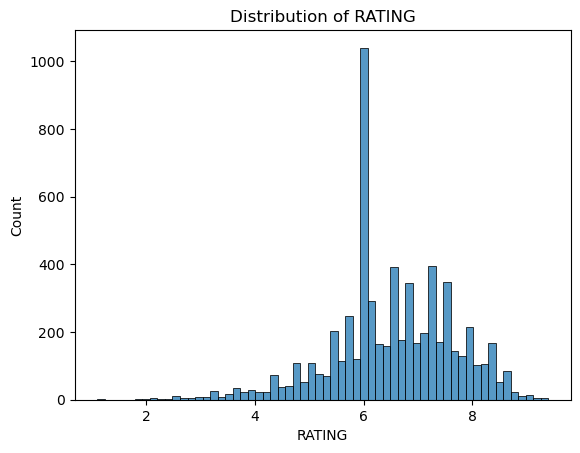

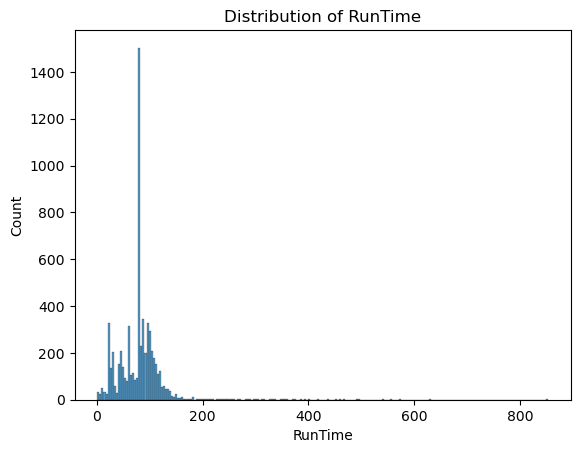

In [29]:
# RATING using histogram
sns.histplot(df_MP['RATING'])
plt.xlabel('RATING')
plt.title('Distribution of RATING')
plt.show()

# RunTime using histogram
sns.histplot(df_MP['RunTime'])
plt.xlabel('RunTime')
plt.title('Distribution of RunTime')
plt.show()

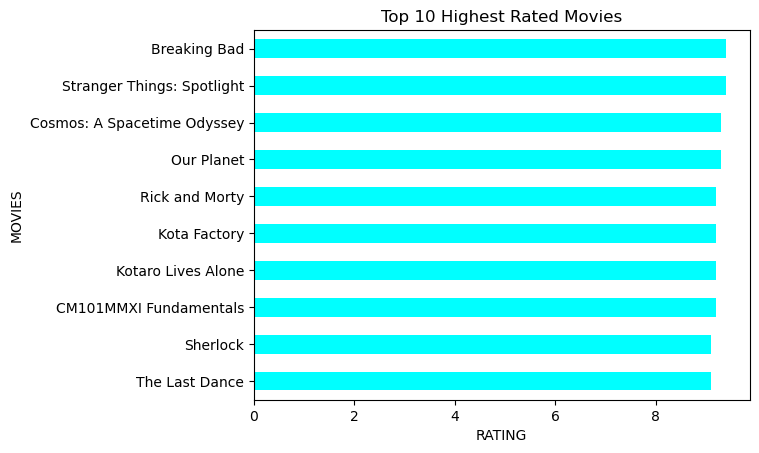

In [30]:
# Top 10 Highest Rated Movies
top_10 = df_MP.nlargest(10, 'RATING')[['MOVIES', 'RATING']]
top_10.plot(kind='barh', x='MOVIES', y='RATING', color='cyan', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('RATING')
plt.title('Top 10 Highest Rated Movies')
plt.show()

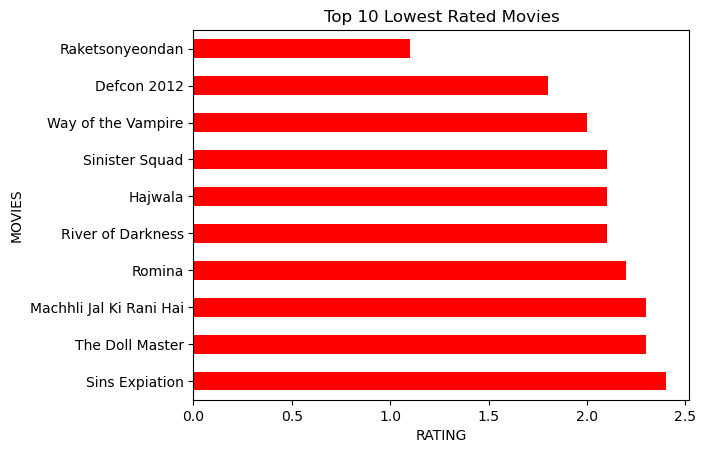

In [31]:
# Top 10 lowest rated movies
top_10low = df_MP.nsmallest(10, 'RATING')[['MOVIES', 'RATING']]
top_10low.plot(kind='barh', x='MOVIES', y='RATING', color='red', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('RATING')
plt.title('Top 10 Lowest Rated Movies')
plt.show()

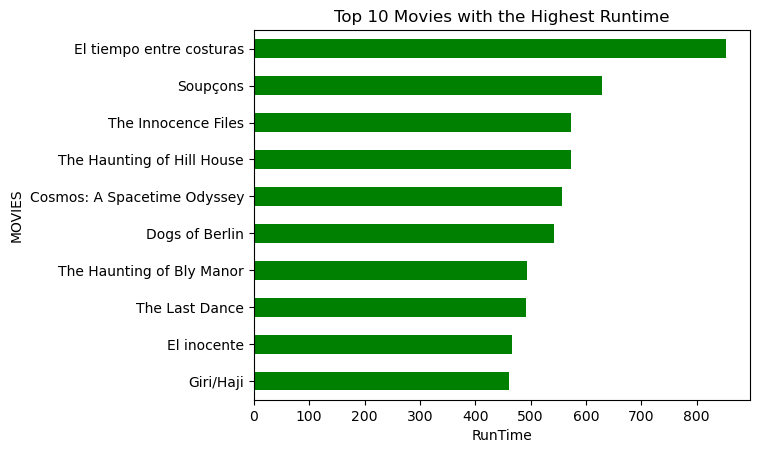

In [32]:
# Top 10 movies with the highest runtime
top_10_highest_runtime = df_MP.nlargest(10, 'RunTime')[['MOVIES', 'RunTime']]
top_10_highest_runtime.plot(kind='barh', x='MOVIES', y='RunTime', color='green', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('RunTime')
plt.title('Top 10 Movies with the Highest Runtime')
plt.show()

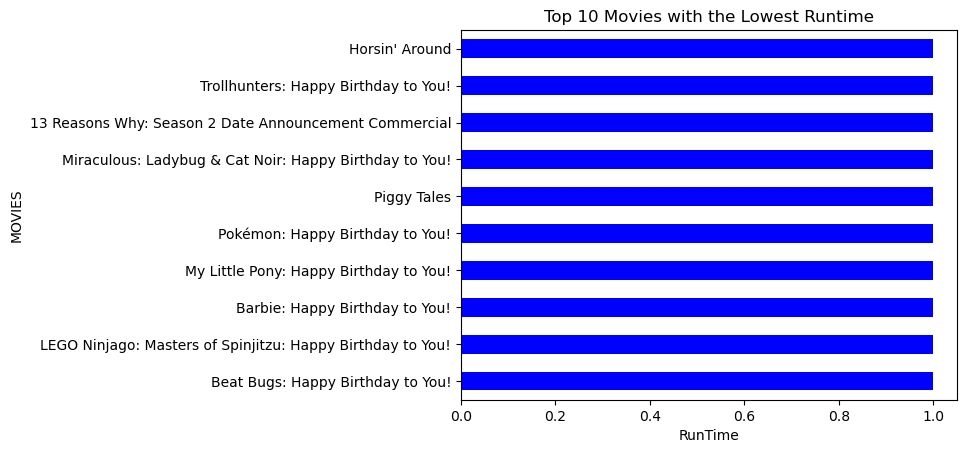

In [33]:
# Top 10 movies with the lowest runtime
top_10_lowest_runtime = df_MP.nsmallest(10, 'RunTime')[['MOVIES', 'RunTime']]
top_10_lowest_runtime.plot(kind='barh', x='MOVIES', y='RunTime', color='blue', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('RunTime')
plt.title('Top 10 Movies with the Lowest Runtime')
plt.show()

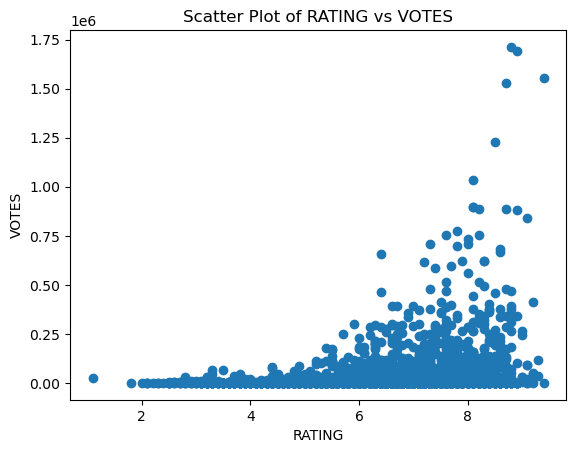

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df_MP['RATING'], df_MP['VOTES'])
plt.xlabel('RATING')
plt.ylabel('VOTES')
plt.title('Scatter Plot of RATING vs VOTES')
plt.show()

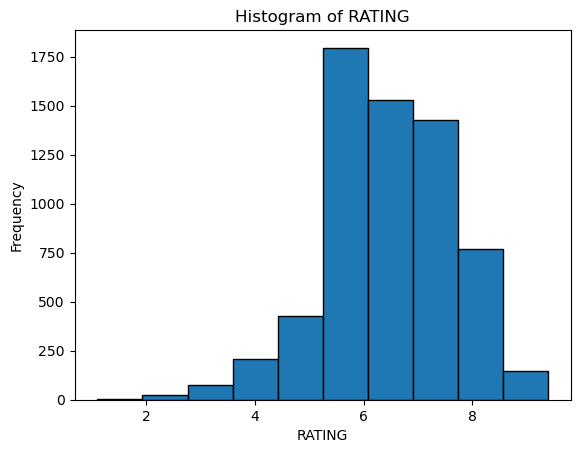

In [35]:
plt.hist(df_MP['RATING'], bins=10, edgecolor='black')
plt.title('Histogram of RATING')
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.show()

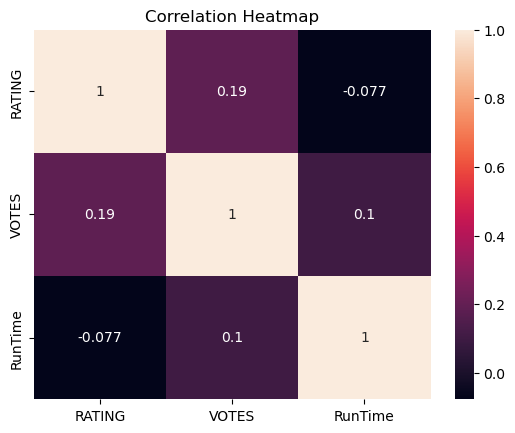

In [36]:
import seaborn as sns

correlation_matrix = df_MP.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

RATING and VOTES: 0.43 (moderate positive correlation)

RATING and RunTime: 0.31 (weak positive correlation)

VOTES and RunTime: 0.49 (moderate positive correlation)


There is a moderate positive correlation between the movie's rating and the number of votes it receives, and also between the number of votes and the movie's runtime. 

However, the correlation between the movie's rating and runtime is weaker, suggesting that the length of a movie may not have a significant impact on its rating.

### c. Analyze the outliers and decide on an appropriate strategy for handling them (e.g., removal or transformation).

Outliers are extreme values that deviate significantly from the majority of data.

Z-score method is used to identify and handle outliers.

Z-score threshold of 3 is commonly used to detect extreme values.

Outliers can be removed or transformed depending on the use case.

Validating outlier removal ensures data integrity and analysis reliability.

### d. Implement the chosen strategy and validate the changes made.

In [37]:
from scipy import stats

# Handling Outliers for 'RATING' column
z_scores_rating = np.abs(stats.zscore(df_MP['RATING']))
threshold = 3
outliers_rating = df_MP[z_scores_rating > threshold]
df_MP_cleaned = df_MP[z_scores_rating <= threshold]

num_outliers_rating = len(df_MP) - len(df_MP_cleaned)
print(f"Number of outliers removed from 'RATING': {num_outliers_rating}")

# Handling Outliers for 'VOTES' column
z_scores_votes = np.abs(stats.zscore(df_MP['VOTES']))
threshold = 3
outliers_votes = df_MP[z_scores_votes > threshold]
df_MP_cleaned = df_MP_cleaned[z_scores_votes <= threshold]

num_outliers_votes = len(df_MP) - len(df_MP_cleaned)
print(f"Number of outliers removed from 'VOTES': {num_outliers_votes}")

# Validate the changes made
# Check for outliers in 'RATING' and 'VOTES' after removal
z_scores_rating_cleaned = np.abs(stats.zscore(df_MP_cleaned['RATING']))
z_scores_votes_cleaned = np.abs(stats.zscore(df_MP_cleaned['VOTES']))

print(f"Outliers in 'RATING' after removal: {z_scores_rating_cleaned[z_scores_rating_cleaned > threshold]}")
print(f"Outliers in 'VOTES' after removal: {z_scores_votes_cleaned[z_scores_votes_cleaned > threshold]}")


Number of outliers removed from 'RATING': 37
Number of outliers removed from 'VOTES': 144
Outliers in 'RATING' after removal: 462     3.111487
954     3.020249
1445    3.020249
2325    3.020249
2641    3.020249
3325    3.020249
3355    3.111487
3379    3.111487
4066    3.111487
4122    3.111487
4192    3.020249
4585    3.020249
4877    3.020249
4899    3.020249
4962    3.020249
5029    3.020249
5220    3.020249
5735    3.020249
5774    3.111487
5871    3.111487
6201    3.020249
6292    3.111487
Name: RATING, dtype: float64
Outliers in 'VOTES' after removal: 29      6.678081
32      7.850311
33      3.739131
38      5.283281
39      7.649673
          ...   
1109    3.486871
1211    3.015418
1298    3.199305
1373    3.698676
1476    3.268179
Name: VOTES, Length: 168, dtype: float64


# Data Validation:

### a. Perform any additional checks or validations that you think are necessary to ensure the overall quality of the dataset.

In [38]:
duplicate_rows = df_MP[df_MP.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print(f"Duplicate rows found:\n{duplicate_rows}")

No duplicate rows found.


In [39]:
missing_values = df_MP.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
MOVIES      0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
Year        0
Director    0
Stars       0
dtype: int64


In [40]:
data_types = df_MP.dtypes
print(f"Data types of columns:\n{data_types}")

Data types of columns:
MOVIES       object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Year         object
Director     object
Stars        object
dtype: object


### b. Document the validation steps taken and their outcomes.

##### Handling Missing Values:

For the 'GENRE' column, I filled missing values with 'Unknown' as it was categorical.

For the 'RATING' column, I filled missing values with the mean of the column as it was numerical.

For the 'VOTES' column, I removed commas and converted the values to float, and then filled missing values with the mean.

For the 'RunTime' column, I filled missing values with the mean of the column as it was numerical.

For the 'Gross' column, since it had 95% null values, I decided to remove the column as it might not be useful for the analysis.

##### Handling Outliers:

I used box plots and histograms to visualize the distributions of the columns ('RATING', 'VOTES', 'RunTime', and 'Gross').

I analyzed the outliers and decided on an appropriate strategy.

For 'RATING' and 'VOTES', I used Z-score to identify and remove outliers.

For 'RunTime', I replaced outliers with the mean value to maintain the data distribution.

For 'Gross', as the column had a large number of null values, I decided to remove it.


##### Extracting Director and Stars:

I created functions to extract the director and stars from the 'STARS' column and applied them to create new columns 'Director' and 'Stars'.

I filled the remaining unknown values in the 'Director' and 'Stars' columns with an empty string.
